In [2]:
import base64


def create_onedrive_directdownload(onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/', '_').replace('+', '-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

# Lineaire Discriminant Analyse

Een lineaire discriminant analyse (LDA) is een methode om **een lineaire combinatie van variabelen** te vinden die twee of meer klassen onderscheidt.  
Het is dus een classificatiemodel zoals een Decision Tree, en kan beschouwd worden als een eenvoudig Neuraal Netwerk met één laag (zie later).

Je _traint_ een LDA-model door het te voeden met een dataset waarbij de klassen bekend zijn. Op die manier is het een supervised learning model.
Na het trainen, kan je het model gebruiken om nieuwe data te classificeren. Elke input wordt dan omgezet naar een lineaire combinatie van de variabelen.  
Het model probeert om de lineaire combinatie zo te kiezen dat de klassen zo goed mogelijk onderscheiden worden. Alle voorbeelden van een bepaalde klasse zullen dus min of meer dezelfde output krijgen.  

## Biospy dataset

Deze bevat 699 observaties van 10 variabelen. De eerste 9 variabelen (`V1,V2, ..., V9`) zijn onafhankelijke variabelen, de laatste variabele (`class`) is de afhankelijke variabele.
_Nota: het woord class is een gereserveerd woord in Python, dus we dit altijd tussen quotes zetten._

In [3]:
import pandas as pd

biopsy_url = create_onedrive_directdownload("https://1drv.ms/u/s!AqjRCbiILxyDgZ4quis69gSajF9LMA?e=PTRT9q")  # biopsy.csv
biopsy = pd.read_csv(biopsy_url)
biopsy.head(n=10)

ID  V1  V2  V3  V4  V5    V6  V7  V8  V9      class
0  1000025   5   1   1   1   2   1.0   3   1   1     benign
1  1002945   5   4   4   5   7  10.0   3   2   1     benign
2  1015425   3   1   1   1   2   2.0   3   1   1     benign
3  1016277   6   8   8   1   3   4.0   3   7   1     benign
4  1017023   4   1   1   3   2   1.0   3   1   1     benign
5  1017122   8  10  10   8   7  10.0   9   7   1  malignant
6  1018099   1   1   1   1   2  10.0   3   1   1     benign
7  1018561   2   1   2   1   2   1.0   3   1   1     benign
8  1033078   2   1   1   1   2   1.0   1   1   5     benign
9  1033078   4   2   1   1   2   1.0   2   1   1     benign

## Trainen van het model

We gebruiken de `LinearDiscriminantAnalysis` uit `sklearn.discriminant_analysis` om een LDA-model te bouwen.\
We gebruiken de eerste 3 onafhankelijke variabelen om het model te trainen. Als je meer variabelen gebruikt, zal het model beter presteren. Dit zullen we later testen.

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# X = biopsy.drop(columns=['ID', 'class']).dropna()  # als je alle onafhankelijke variabelen wil gebruiken
X = biopsy[['V1', 'V2', 'V3']].dropna()  # onafhankelijk variabelen
y = biopsy['class'][X.index]  # afhankelijke variable waarvoor X niet NaN is

model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

## Discriminantfuncties

Een discriminantfunctie is functie die als input een aantal variabelen neemt en als output één getal geeft. Afhankelijk van de dataset zijn er meer of minder discriminantfuncties nodig om de klassen te onderscheiden.

> $LD_1(V_1, V_2,...,V_m) = w_{1,1} \cdot V_1 + w_{1,2} \cdot V_2 + ... + w_{1,m} \cdot V_m$  \
> $LD_2(V_1, V_2,...,V_m) = w_{2,1} \cdot V_1 + w_{2,2} \cdot V_2 + ... + w_{2,m} \cdot V_m$
> $...$
> $LD_n(V_1, V_2,...,V_m) = w_{n,1} \cdot V_1 + w_{n,2} \cdot V_2 + ... + w_{n,m} \cdot V_m$    

Het aantal discriminantfuncties kunnen we berekenen met:
> $N = min(\#aantal~onafhankelijke~variabelen, klassenwaarden - 1)$\
  
In ons geval is het aantal onafhankelijke variabelen 3 en zijn er 2 klassen. Zelfs als we meer dan 3 onafhankelijke variabelen zouden hebben, zouden we nog altijd maar 1 discriminantfunctie nodig hebben, omdat er maar 2 klassen zijn.

> $N = min(3, 2 - 1)$\
> $N = 1$

> $LD_1(V_1, V_2,V_3) = w_{1,1} \cdot V_1 + w_{1,2} \cdot V_2 + w_{1,3} \cdot V_3$

In [87]:
import numpy as np 
print(model.scalings_) # w1, w2, w3
np.dot(X, model.scalings_) # w1 * V1 + w2 * V2 + w3 * V3 == dot product

[[0.23214858]
 [0.25748053]
 [0.25007652]]


array([[1.66829997],
       [3.19097113],
       [1.2040028 ],
       [5.45334794],
       [1.43615139],
       [6.93275921],
       [0.73970564],
       [1.22193074],
       [0.97185422],
       [1.69363192],
       [0.73970564],
       [0.97185422],
       [2.68341408],
       [0.73970564],
       [4.90993501],
       [4.15542134],
       [1.43615139],
       [1.43615139],
       [5.87438521],
       [1.90044855],
       [2.89763472],
       [4.8592711 ],
       [1.2040028 ],
       [4.1374934 ],
       [0.73970564],
       [2.42593355],
       [1.46148334],
       [1.66829997],
       [0.97185422],
       [1.23985868],
       [1.2040028 ],
       [0.97185422],
       [5.87438521],
       [0.97185422],
       [1.45407932],
       [0.97185422],
       [7.39705638],
       [2.15792909],
       [3.19097113],
       [2.5019294 ],
       [4.43823383],
       [4.10163753],
       [6.46846205],
       [3.95600872],
       [7.39705638],
       [0.73970564],
       [4.24934514],
       [0.739

In [ ]:
# discriminant functies
# def LD1(V1,V2,V3):
#     return w1 * V1 + w2 * V2 + w3 * V3
#
# def LD2(V1,V2,V3):
#     ....

## Transformeren van de data

De `transform`-methode van het model kan gebruikt worden om de inputdata te transformeren naar de outputs van discriminantfuncties.\
In ons geval is er maar één discriminantfunctie, dus krijgen we maar één output.\

Zie je een verband tussen de output van de discriminantfunctie en de afhankelijke variabele?
Wat gebeurt er als je meer onafhankelijke variabelen gebruikt?

In [34]:
pd.DataFrame(zip(model.transform(X)[:6], y[:6]), columns=['LD1', 'class'])

LD1      class
0  [1.6706917979872633]     benign
1  [3.1955460060607344]     benign
2   [1.205728973202154]     benign
3    [5.46116636255125]     benign
4  [1.4382103855947086]     benign
5    [6.94269865938534]  malignant

## Descriptieve analyse


In [7]:
LD_df = pd.concat([X, pd.DataFrame(model.transform(X), columns=['LD1']), pd.Series(y, name='Target')], axis=1)
LD_df

V1  V2  V3       LD1     Target
0     5   1   1 -0.966444     benign
1     5   4   4  0.556227     benign
2     3   1   1 -1.430741     benign
3     6   8   8  2.818604     benign
4     4   1   1 -1.198593     benign
..   ..  ..  ..       ...        ...
694   3   1   1 -1.430741     benign
695   2   1   1 -1.662890     benign
696   5  10  10  3.601569  malignant
697   4   8   6  1.854153  malignant
698   4   8   8  2.354307  malignant

[699 rows x 5 columns]

In [8]:
LD_df[['LD1', 'Target']].groupby('Target').agg(['mean', 'std'])

LD1          
               mean       std
Target                       
benign    -1.246272  0.680026
malignant  2.368433  1.422537

## Visualisatie van de discriminantfunctie

We zullen de discriminantfunctie visualiseren door een histogram te maken van de output van de discriminantfunctie voor elke klasse.\
Dit maakt nog duidelijker dat de output van de discriminantfunctie een goede voorspeller is van de klasse.

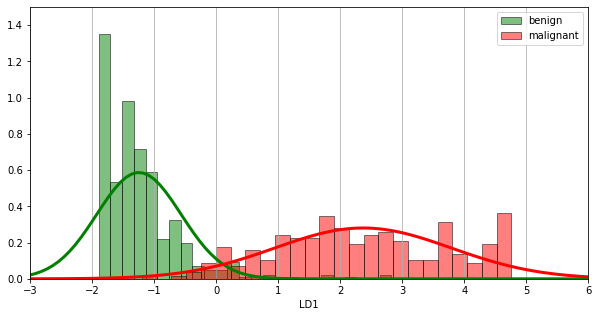

In [9]:
# Met één as
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['green', 'red']
x = np.linspace(-3, 6, 100)

for i, target_value in enumerate(LD_df.Target.unique()):
    mean = LD_df['LD1'][LD_df['Target'] == target_value].mean()
    std = LD_df['LD1'][LD_df['Target'] == target_value].std()
    verdeling = norm(loc=mean, scale=std)
    LD_df['LD1'][LD_df['Target'] == target_value].hist(ax=ax,
                                                       bins=25, density=True,
                                                       edgecolor='black', color=colors[i], alpha=0.5,
                                                       label=target_value)
    ax.plot(x, verdeling.pdf(x), color=colors[i], linewidth=3)
    ax.legend()
    ax.grid(axis='y')
    ax.set_xlim((-3, 6))
    ax.set_ylim((0, 1.5))
    ax.set_xlabel('LD1')

## Predictieve analyse

We kunnen het LDA-model ook gebruiken om voorspellingen te doen.\
Een LDA-model kan zowel **kansen** als **voorspelde waarden** outputten.

In [9]:
scores = model.predict_proba(X)  # output kansen of scores
y_pred = model.predict(X)  # output de voorspelde klassen.
y_true = y  # y bevat gewoon de echte klassen

df = pd.DataFrame(zip(scores[:, 0], scores[:, 1], y_pred, y), columns=['benign', 'malignant', 'y_pred', 'y_true'])
df

benign     malignant     y_pred     y_true
0    0.999986  1.403109e-05     benign     benign
1    0.001928  9.980722e-01  malignant     benign
2    0.999992  8.470572e-06     benign     benign
3    0.013995  9.860048e-01  malignant     benign
4    0.999991  9.164192e-06     benign     benign
..        ...           ...        ...        ...
678  0.999996  3.840302e-06     benign     benign
679  1.000000  3.351309e-07     benign     benign
680  0.000043  9.999568e-01  malignant  malignant
681  0.003934  9.960659e-01  malignant  malignant
682  0.000781  9.992194e-01  malignant  malignant

[683 rows x 4 columns]

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
# pd.crosstab(df.y_true, df.y_pred, margins='all') # kan ook met een crosstab

### Voorspellingen op nieuwe data

In [12]:
model.predict(pd.DataFrame([[0.4, 0.9, 0.1]], columns=['V1', 'V2', 'V3']))

array(['benign'], dtype='<U9')